# Fitting Models to Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Linear Regression
 
Suppose we have $n+1$ points

$$
(t_0,y_0) , (t_1,y_1) , \dots , (t_n,y_n)
$$

and we want to fit a line

$$
y=c_0 + c_1t
$$

that "best fits" the data. There are different ways to quantify what "best fit" means but the most common method is called [least squares linear regression](https://en.wikipedia.org/wiki/Linear_regression). In least squares linear regression, we want to minimize the sum of squared errors

$$
SSE = \sum_i (y_i - (c_0 + c_1 t_i))^2
$$

In matrix notation

$$
A =
\begin{bmatrix}
1 & t_0 \\\
1 & t_1 \\\
\vdots & \vdots \\\
1 & t_n
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{c} = 
\begin{bmatrix}
c_0 \\\ c_1
\end{bmatrix}
$$

then the sum of squared errors can be expressed as

$$
SSE = \Vert \mathbf{y} - A \mathbf{c} \Vert^2
$$

We solve for the coefficients $\mathbf{c} = [c_0,c_1]^T$ which minimize $\Vert \mathbf{y} - A \mathbf{c} \Vert^2$ in 2 two ways:

### Normal Equations

The coefficient vector $\mathbf{c}$ is the unique solution of the system 

$$
\left( A^T A \right) \mathbf{c} = A^T \mathbf{y}
$$

### QR Decomposition

Let $A = Q_1R_1$ be the [(thin) QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of $A$ (where $R_1$ is square upper triangular). The coefficient vector $\mathbf{c}$ is the unique solution of the system

$$
R_1 \mathbf{c} = Q_1^T \mathbf{y}
$$

### Example: Fake Noisy Linear Data

Let's do an example with some fake data. Let's build a set of random points based on the model

$$
y = c_0 + c_1 t + \epsilon
$$

for some arbitrary choice of $c_0$ and $c_1$. The factor $\epsilon$ represents some random noise which we model using the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). We can generate random numbers sampled from the standard normal distribution using the NumPy function [`numpy.random.randn`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html).

The goal is to demonstrate that we can use linear regression to retrieve the coefficeints $c_0$ and $c_1$ from the linear regression calculation.

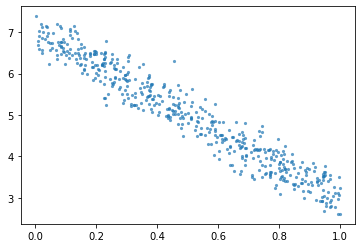

In [29]:
c0 = 7
c1 = -4
N = 500
t = np.random.rand(N)
noise = 0.3*np.random.randn(N)
y = c0 + c1*t + noise
plt.scatter(t,y,alpha=0.7,lw=0,s=10);
plt.show()

Let's use linear regression to retrieve the coefficients $c_0$ and $c_1$. Construct the matrix $A$:

In [30]:
A = np.column_stack([np.ones(N),t])
print(A.shape)

(500, 2)


Let's look at the first 5 rows of $A$ to see that it is in the correct form:

In [31]:
A[:5,:]

array([[1.        , 0.19413332],
       [1.        , 0.99992016],
       [1.        , 0.28799691],
       [1.        , 0.30049858],
       [1.        , 0.37248886]])

Use `scipy.linalg.solve` to solve $\left(A^T A\right)\mathbf{c} = \left(A^T\right)\mathbf{y}$ for $\mathbf{c}$:

In [32]:
c = la.solve(A.T @ A, A.T @ y)
print(c)

[ 7.01943868 -4.04761626]


We have retrieved the coefficients of the model almost exactly! Let's plot the random data points with the linear regression we just computed.

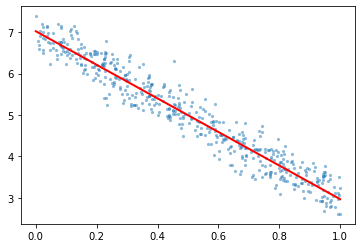

In [33]:
ts = np.linspace(0,1,10)
ys = c[0] + c[1]*ts
plt.plot(ts,ys,'r',linewidth=2)
plt.scatter(t,y,alpha=0.5,lw=0,s=10);
plt.show()

## Polynomial Regression

The same idea works for fitting a degree $d$ polynomial model

$$
y = c_0 + c_1t + c_2t^2 + \cdots + c_dt^d
$$

to a set of $n+1$ data points

$$
(t_0,y_0), (t_1,y_1), \dots , (t_n,y_n)
$$

We form the matrices as before but now the Vandermonde matrix $A$ has $d+1$ columns

$$
A =
\begin{bmatrix}
1 & t_0 & t_0^2 & \cdots & t_0^d \\\
1 & t_1 & t_1^2 & \cdots & t_1^d \\\
 & \vdots & & & \vdots \\\
1 & t_n & t_n^2 & \cdots & t_n^d
\end{bmatrix}
\ , \ \
\mathbf{y} =
\begin{bmatrix}
y_0 \\\
y_1 \\\
\vdots \\\
y_n
\end{bmatrix}
\ , \ \
\mathbf{c} =
\begin{bmatrix}
c_0 \\\
c_1 \\\
c_2 \\\
\vdots \\\
cd_d
\end{bmatrix}
$$

The coefficients $\mathbf{c} = [c_0,c_1,c_2,\dots,c_d]^T$ which minimize the sum of squared errors $SSE$ is the unique solution of the linear system

$$
\left( A^T A \right) \mathbf{c} = \left( A^T \right) \mathbf{y}
$$

### Example: Fake Noisy Quadratic Data

Let's build some fake data using a quadratic model $y = c_0 + c_1x + c_2x^2 + \epsilon$ and use linear regression to retrieve the coefficients $c_0$, $c_1$ and $c_2$.

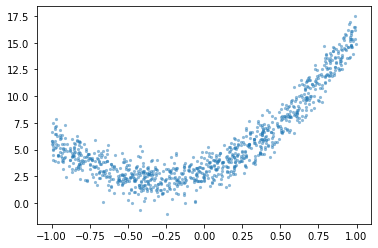

In [35]:
c0 = 3
c1 = 5
c2 = 8
N = 1000
t = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = c0 + c1*t + c2*t**2 + noise
plt.scatter(t,y,alpha=0.5,lw=0,s=10);
plt.show()

Construct the matrix $A$:

In [36]:
A = np.column_stack([np.ones(N),t,t**2])

Use `scipy.linalg.solve` to solve $\left( A^T A \right) \mathbf{c} = \left( A^T \right) \mathbf{y}$:

In [37]:
c = la.solve(A.T @ A,A.T @ y)

Plot the result:

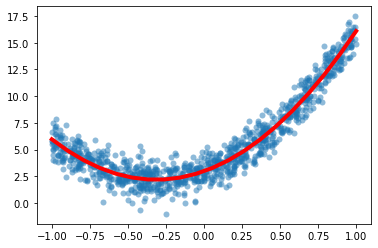

In [38]:
ts = np.linspace(-1,1,20)
ys = c[0] + c[1]*ts + c[2]*ts**2
plt.plot(ts,ys,'r',linewidth=4)
plt.scatter(t,y,alpha=0.5,lw=0)
plt.show()

Let's solve again but this time we use the QR decomposition:

In [39]:
Q1,R1 = la.qr(A,mode='economic')
b = Q1.T @ y
c1 = la.solve(R1,b[:3])

Plot the result:

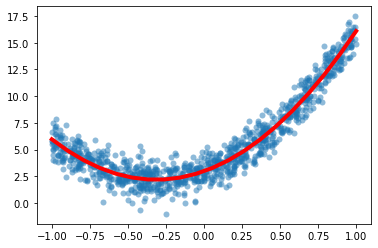

In [40]:
ts = np.linspace(-1,1,20)
ys = c1[0] + c1[1]*ts + c1[2]*ts**2
plt.plot(ts,ys,'r',linewidth=4)
plt.scatter(t,y,alpha=0.5,lw=0)
plt.show()